in this data because we dont have the target values so we cant compare the training data with the test data, so no need to split our data to train and test set.


In [3]:
import pandas as pd


In [10]:
df = pd.read_csv("customers.csv")
df = df.drop("ID", axis=1)
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(df)

df = scaler.transform(df)

print(df)
# Convert the scaled array back to a DataFrame
df_scaled = pd.DataFrame(df)

# Display the first few rows of the scaled DataFrame
print(df_scaled.head())



[[-0.91739884 -0.99302433  2.65361447 ...  0.09752361  0.29682303
   1.552326  ]
 [ 1.09003844  1.00702467 -1.18713209 ...  0.78265438  0.29682303
   1.552326  ]
 [-0.91739884 -0.99302433  1.11731585 ... -0.83320224 -1.26952539
  -0.90972951]
 ...
 [-0.91739884 -0.99302433 -0.41898277 ... -0.90695688 -1.26952539
  -0.90972951]
 [ 1.09003844  1.00702467 -1.01643224 ... -0.60332923 -1.26952539
  -0.90972951]
 [-0.91739884 -0.99302433 -0.93108232 ... -1.3789866  -1.26952539
  -0.90972951]]
          0         1         2         3         4         5         6
0 -0.917399 -0.993024  2.653614  1.604323  0.097524  0.296823  1.552326
1  1.090038  1.007025 -1.187132 -0.063372  0.782654  0.296823  1.552326
2 -0.917399 -0.993024  1.117316 -0.063372 -0.833202 -1.269525 -0.909730
3 -0.917399 -0.993024  0.775916 -0.063372  1.328386  0.296823  0.321298
4 -0.917399 -0.993024  1.458716 -0.063372  0.736932  0.296823  0.321298


In [26]:
from sklearn.cluster import KMeans

inertia = []
for k in range (1, 5):
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(df_scaled)
  inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


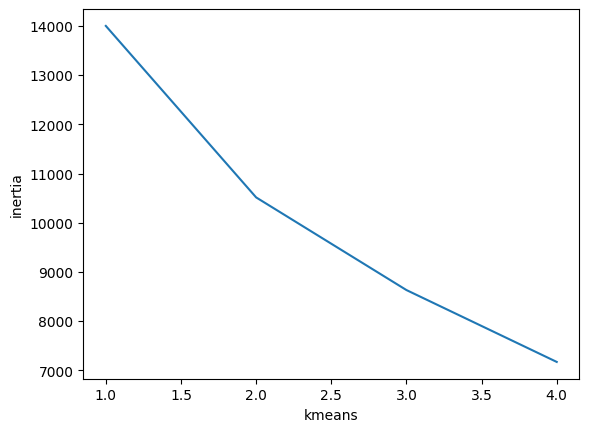

In [28]:
import matplotlib.pyplot as plt

plt.plot(range(1,5),inertia)
plt.xlabel("kmeans")
plt.ylabel('inertia')
plt.show()

The silhouette method is a technique used to determine the optimal number of clusters (k) in a dataset for clustering algorithms like K-means. It evaluates the quality of clustering by measuring how similar each sample is to its own cluster compared to other clusters.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

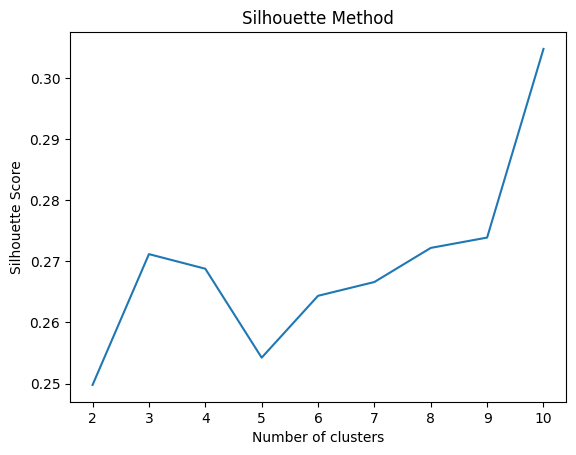

In [29]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(df_scaled)
  labels = kmeans.labels_
  sil.append(silhouette_score(df_scaled, labels, metric = 'euclidean'))

plt.plot(range(2, kmax+1), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()
